In [1]:
#import library for reading and manipulation of data
import pandas as pd
import numpy as np
#import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
#import library to split data
from sklearn.model_selection import train_test_split
#import library for preprocessing
from sklearn.preprocessing import LabelBinarizer

In [2]:
pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#to import keras and tensorflow
import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
#Load the label
labels = pd.read_csv("/content/drive/MyDrive/AILEAD TECH CLASSES/assignment/Labels.csv")
labels.shape
labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [6]:
label_list= ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common Wheat', 'Fat Hen','Loose Silky-bent',
             'Maize','Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

In [7]:
#Load the image
images= np.load("/content/drive/MyDrive/AILEAD TECH CLASSES/assignment/images (1).npy")
images.shape

(4750, 128, 128, 3)

It was observed that the data is stored in a 4-dimensional NumPy array. The first dimension 4750 indicates the number of images, and each image is stacked on top of the other as a 3-dimensional NumPy array. The second dimension 128 indicates that the number of pixels along the x-axis, The third dimension 128 indicates that the number of pixels along the y-axis and the fourth dimension 3 is the total number of channels in those images i.e. these are colored images consisting of RGB (Red, Green, and Blue) channels.

Split the data

In [8]:
#split the variables into train and test
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=0)
images_train.shape

(3800, 128, 128, 3)

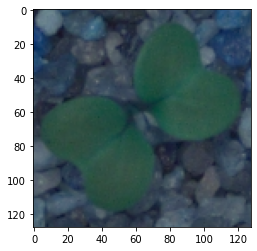

In [9]:
#Visualize images
plt.imshow(images_train[0])
plt.show()

In [10]:
#Normalize images
images_train= images_train.astype('float32')/255.0
images_test= images_test.astype('float32')/255.0
images_train.shape

(3800, 128, 128, 3)

In [11]:
labels_train.dtypes

Label    object
dtype: object

In [12]:
#Encode the label to help get the classes in the Label
enc= LabelBinarizer()
labels_train_encoded=enc.fit_transform(labels_train)
labels_test_encoded=enc.fit_transform(labels_test)
#visualize the train shape
labels_train_encoded.shape

(3800, 12)

In [13]:
labels_test_encoded=enc.fit_transform(labels_test)
#visualize the test shape
labels_test_encoded.shape

(950, 12)

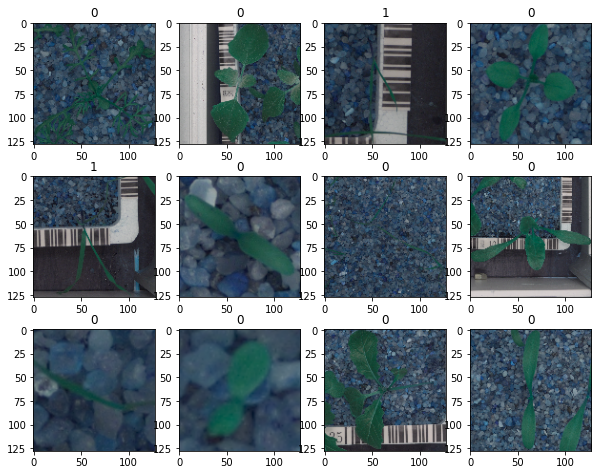

In [14]:
# To visualize the classes in the label
rows = 3
cols = 4
fig = plt.figure(figsize=(10, 8))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(labels_train_encoded))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(images_train[random_index, :])
        ax.set_title(labels_train_encoded[random_index, 0])

In [15]:
#set seed for reproducibility
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [16]:
#import keras sequential model
from tensorflow.keras.models import Sequential
#import all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [17]:
#initializing a sequential model
model1= Sequential()
# First layer
#Adding the first conv layer with a 64filter and kernel size of (3X3), padding='same' provide the outputsize as same as input size
#input_shape implies input image dimension of the dataset
model1.add(Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(128,128,3)))
#adding the maxpooling to reduce the size of the first conv layer and also normalize the data
model1.add(MaxPooling2D())
model1.add(BatchNormalization())
# Second layer will be repetition of the first layer with reduced filter from 64 to 32
model1.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D())
model1.add(BatchNormalization())
# Third Layer will be the repetition of the second layer
model1.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model1.add(MaxPooling2D())
model1.add(BatchNormalization())
# Flattening the output after max pooling to make it ready for dense creation
model1.add(Flatten())
# Adding fully connected layer with 128 neurons
model1.add(Dense(128, activation='relu'))
# Adding the output layer with 12 neurons and the activation function is softmax
model1.add(Dense(12, activation='softmax'))

In [18]:
#Build the compiler using Adam optimizer 
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [19]:
#View the model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

In [20]:
#Build the model
history1=model1.fit(images_train, labels_train_encoded, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
48/48 [==============================] - 12s 74ms/step - loss: 1.7342 - accuracy: 0.4717 - val_loss: 4.2367 - val_accuracy: 0.0789
Epoch 2/10
48/48 [==============================] - 2s 47ms/step - loss: 0.6183 - accuracy: 0.7961 - val_loss: 9.7390 - val_accuracy: 0.0553
Epoch 3/10
48/48 [==============================] - 2s 47ms/step - loss: 0.2143 - accuracy: 0.9299 - val_loss: 11.4568 - val_accuracy: 0.1461
Epoch 4/10
48/48 [==============================] - 2s 47ms/step - loss: 0.0660 - accuracy: 0.9849 - val_loss: 13.7163 - val_accuracy: 0.1487
Epoch 5/10
48/48 [==============================] - 2s 47ms/step - loss: 0.0320 - accuracy: 0.9951 - val_loss: 13.5477 - val_accuracy: 0.0553
Epoch 6/10
48/48 [==============================] - 2s 48ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 11.8814 - val_accuracy: 0.0605
Epoch 7/10
48/48 [==============================] - 2s 48ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 11.7500 - val_accuracy: 0.0724
Epoch 8

In [21]:
model1.evaluate(images_test, labels_test_encoded)

30/30 [==============================] - 1s 14ms/step - loss: 4.9531 - accuracy: 0.2432


[4.953057765960693, 0.24315789341926575]

The train data accuracy gets to 1 and the test data accuracy is 0.2663. The Model1 is overfitting due it generalizing on the training data but not on validation and test data.

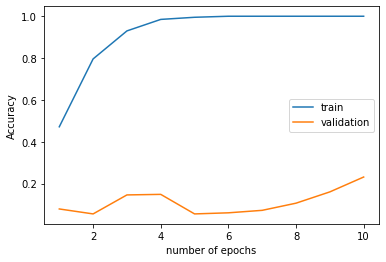

In [22]:
#viaualize the model performance
acc= history1.history['accuracy']
val_acc= history1.history['val_accuracy']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='validation')
plt.legend()
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [23]:
#clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [24]:
#set seed for reproducibility
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [25]:
 #initializing a sequential model
model2= Sequential()
#Adding the first conv layer with a 64 filter and kernel size of (3X3), padding='same' provide the outputsize as same as input size
#input_shape implies input image dimension of the dataset
model2.add(Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(128,128,3)))
#adding the maxpooling to reduce the size of the first conv layer and also normalize the data
model2.add(MaxPooling2D())
model2.add(BatchNormalization())
# Second layer will be repetition of the first layer with reduced filter from 64 to 32
model2.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(BatchNormalization())
# Third Layer will be the repetition of the second layer
model2.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(BatchNormalization())
# Fourth Layer will be the repetition of the second layer
model2.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D())
model2.add(BatchNormalization())
# Flattening the output after max pooling to make it ready for dense creation
model2.add(Flatten())
#Adding fully connected layer with 100 neurons
model2.add(Dense(100, activation='relu'))
#Adding drop out of 20%
model2.add(Dropout(0.2))
#Adding fully connected layer with 32 neurons
model2.add(Dense(32, activation='relu'))
#Adding drop out of 20%
model2.add(Dropout(0.2))
# Adding the output layer with 10 neurons and the activation function is softmax
model2.add(Dense(12, activation='softmax'))

In [26]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [27]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

In [28]:
history2=model2.fit(images_train, labels_train_encoded, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
48/48 [==============================] - 4s 56ms/step - loss: 2.3025 - accuracy: 0.2309 - val_loss: 2.5345 - val_accuracy: 0.1474
Epoch 2/10
48/48 [==============================] - 2s 48ms/step - loss: 1.4997 - accuracy: 0.5079 - val_loss: 4.4532 - val_accuracy: 0.1474
Epoch 3/10
48/48 [==============================] - 2s 48ms/step - loss: 1.0749 - accuracy: 0.6266 - val_loss: 6.6536 - val_accuracy: 0.1474
Epoch 4/10
48/48 [==============================] - 2s 48ms/step - loss: 0.8564 - accuracy: 0.7072 - val_loss: 8.2699 - val_accuracy: 0.1474
Epoch 5/10
48/48 [==============================] - 2s 48ms/step - loss: 0.7006 - accuracy: 0.7632 - val_loss: 9.7495 - val_accuracy: 0.1474
Epoch 6/10
48/48 [==============================] - 2s 48ms/step - loss: 0.5611 - accuracy: 0.8201 - val_loss: 7.3013 - val_accuracy: 0.1395
Epoch 7/10
48/48 [==============================] - 2s 51ms/step - loss: 0.4659 - accuracy: 0.8368 - val_loss: 4.7269 - val_accuracy: 0.1697
Epoch 8/10
48

The Model2 is underfitting. It does not generalizes well on both training, validation and test data

In [29]:
model2.evaluate(images_test, labels_test_encoded)

30/30 [==============================] - 0s 8ms/step - loss: 5.0087 - accuracy: 0.2242


[5.008737564086914, 0.22421053051948547]

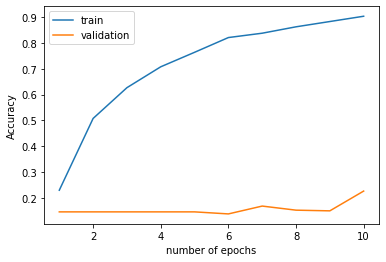

In [30]:
acc= history2.history['accuracy']
val_acc= history2.history['val_accuracy']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='validation')
plt.legend()
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [31]:
#clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [32]:
#set seed for reproducibility
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [33]:
 #initializing a sequential model
model3= Sequential()
#Adding the first conv layer with a 64 filter and kernel size of (3X3), padding='same' provide the outputsize as same as input size
#input_shape implies input image dimension of the dataset
model3.add(Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(128,128,3)))
#adding the maxpooling to reduce the size of the first conv layer and also normalize the data
model3.add(MaxPooling2D())
model3.add(BatchNormalization())
# Second layer will be repetition of the first layer with reduced filter from 64 to 32
model3.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(BatchNormalization())
# Third layer will be repetition of the second layer
model3.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(BatchNormalization())
# Fourth layer will be repetition of the second layer
model3.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(BatchNormalization())
# Fifth layer will be repetition of the the second layer
model3.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(BatchNormalization())
# Flattening the output after max pooling to make it ready for dense creation
model3.add(Flatten())
#Adding fully connected layer with 64 neurons
model3.add(Dense(128, activation='relu'))
#Adding drop out of 25%
model3.add(Dropout(0.25))
#Adding fully connected layer with 64 neurons
model3.add(Dense(128, activation='relu'))
#Adding drop out of 25%
model3.add(Dropout(0.25))
# Adding the output layer with 12 neurons and the activation function is softmax
model3.add(Dense(12, activation='softmax'))

In [34]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [35]:
model3.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f16603b9f40>>

The summary is not populating

In [36]:
history3=model3.fit(images_train, labels_train_encoded, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
48/48 [==============================] - 4s 56ms/step - loss: 2.2574 - accuracy: 0.2520 - val_loss: 2.7148 - val_accuracy: 0.1474
Epoch 2/20
48/48 [==============================] - 2s 49ms/step - loss: 1.4835 - accuracy: 0.4934 - val_loss: 4.0427 - val_accuracy: 0.1474
Epoch 3/20
48/48 [==============================] - 2s 49ms/step - loss: 1.1379 - accuracy: 0.6207 - val_loss: 6.2400 - val_accuracy: 0.1474
Epoch 4/20
48/48 [==============================] - 2s 49ms/step - loss: 0.8806 - accuracy: 0.7112 - val_loss: 7.2547 - val_accuracy: 0.1474
Epoch 5/20
48/48 [==============================] - 2s 49ms/step - loss: 0.7177 - accuracy: 0.7566 - val_loss: 10.5691 - val_accuracy: 0.1474
Epoch 6/20
48/48 [==============================] - 2s 49ms/step - loss: 0.5815 - accuracy: 0.8030 - val_loss: 9.4299 - val_accuracy: 0.1474
Epoch 7/20
48/48 [==============================] - 2s 49ms/step - loss: 0.5084 - accuracy: 0.8204 - val_loss: 10.6573 - val_accuracy: 0.1474
Epoch 8/20


In [37]:
model3.evaluate(images_test, labels_test_encoded)

30/30 [==============================] - 0s 8ms/step - loss: 1.0319 - accuracy: 0.7526


[1.0318981409072876, 0.7526316046714783]

The model3 generalizes well on train but not on the validation and test however we can see an improvement on the Model with increase in hidden layer and epochs. The model will be further improved. 

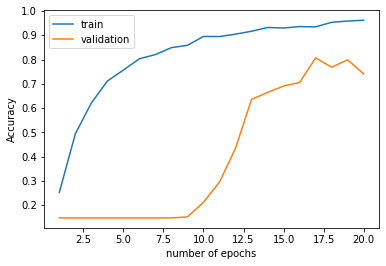

In [38]:
acc= history3.history['accuracy']
val_acc= history3.history['val_accuracy']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='validation')
plt.legend()
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [39]:
#clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [40]:
#set seed for reproducibility
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [41]:
#initializing a sequential model
model4= Sequential()
#Adding the first conv layer with a 64 filter and kernel size of (3X3), padding='same' provide the outputsize as same as input size
#input_shape implies input image dimension of the dataset
model4.add(Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(128,128,3)))
#adding the maxpooling to reduce the size of the first conv layer and also normalize the data
model4.add(MaxPooling2D())
model4.add(BatchNormalization())
# Second layer will be repetition of the first layer with reduced filter from 64 to 32
model4.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D())
model4.add(BatchNormalization())
# Third layer will be repetition of the second layer
model4.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D())
model4.add(BatchNormalization())
# Fourth layer will be repetition of the second layer
model4.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D())
model4.add(BatchNormalization())
# Fifth layer will be repetition of the second layer
model4.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D())
model4.add(BatchNormalization())
# Flattening the output after max pooling to make it ready for dense creation
model4.add(Flatten())
#Adding fully connected layer with 64 neurons
model4.add(Dense(128, activation='relu'))
#Adding drop out of 30%
model4.add(Dropout(0.3))
#Adding fully connected layer with 64 neurons
model4.add(Dense(128, activation='relu'))
#Adding drop out of 30%
model4.add(Dropout(0.3))
# Adding the output layer with 12 neurons and the activation function is softmax
model4.add(Dense(12, activation='softmax'))

In [42]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [43]:
model4.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f1660057220>>

In [44]:
history4=model4.fit(images_train, labels_train_encoded, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
48/48 [==============================] - 4s 55ms/step - loss: 2.2959 - accuracy: 0.2391 - val_loss: 2.5990 - val_accuracy: 0.1474
Epoch 2/20
48/48 [==============================] - 2s 48ms/step - loss: 1.5336 - accuracy: 0.4776 - val_loss: 3.6077 - val_accuracy: 0.1474
Epoch 3/20
48/48 [==============================] - 2s 48ms/step - loss: 1.2153 - accuracy: 0.5822 - val_loss: 5.6976 - val_accuracy: 0.1474
Epoch 4/20
48/48 [==============================] - 2s 49ms/step - loss: 0.9674 - accuracy: 0.6714 - val_loss: 7.0041 - val_accuracy: 0.1474
Epoch 5/20
48/48 [==============================] - 2s 49ms/step - loss: 0.8380 - accuracy: 0.7217 - val_loss: 7.8191 - val_accuracy: 0.1474
Epoch 6/20
48/48 [==============================] - 2s 48ms/step - loss: 0.6870 - accuracy: 0.7595 - val_loss: 7.3215 - val_accuracy: 0.1474
Epoch 7/20
48/48 [==============================] - 2s 49ms/step - loss: 0.6021 - accuracy: 0.7961 - val_loss: 8.7459 - val_accuracy: 0.1474
Epoch 8/20
48

In [45]:
model4.evaluate(images_test, labels_test_encoded)

30/30 [==============================] - 0s 9ms/step - loss: 1.3329 - accuracy: 0.7126


[1.3328990936279297, 0.7126315832138062]

The Model4 overfit due to it generalizing well with the train data but not generalizing well with the validation and test data. There are improvement with the model with increase in number of drop out.

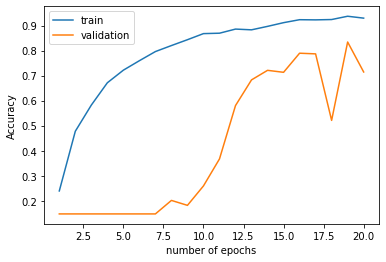

In [46]:
acc= history4.history['accuracy']
val_acc= history4.history['val_accuracy']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='validation')
plt.legend()
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [47]:
#clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [48]:
#set seed for reproducibility
np.random.seed(2)
import random
random.seed(2)
tf.random.set_seed(2)

In [49]:
early_stopping= EarlyStopping(monitor='val_accuracy', patience=10)

In [50]:
#initializing a sequential model
model5= Sequential()
#Adding the first conv layer with a 64 filter and kernel size of (3X3), padding='same' provide the outputsize as same as input size
#input_shape implies input image dimension of the dataset
model5.add(Conv2D(64,(3,3), padding='same', activation='relu', input_shape=(128,128,3)))
#adding the maxpooling to reduce the size of the first conv layer and also normalize the data
model5.add(MaxPooling2D())
model5.add(BatchNormalization())
# Second layer will be repetition of the first layer with reduced filter from 64 to 32
model5.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D())
model5.add(BatchNormalization())
# Third layer will be repetition of the second layer
model5.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D())
model5.add(BatchNormalization())
# Fourth layer will be repetition of the second layer
model5.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D())
model5.add(BatchNormalization())
# Fifth layer will be repetition of the second layer
model5.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D())
model5.add(BatchNormalization())
# Sixth layer will be repetition of the second layer
model5.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D())
model5.add(BatchNormalization())
# Flattening the output after max pooling to make it ready for dense creation
model5.add(Flatten())
#Adding fully connected layer with 64 neurons
model5.add(Dense(100, activation='relu'))
#Adding drop out of 25%
model5.add(Dropout(0.3))
#Adding fully connected layer with 64 neurons
model5.add(Dense(100, activation='relu'))
#Adding drop out of 25%
model5.add(Dropout(0.3))
# Adding the output layer with 12 neurons and the activation function is softmax
model5.add(Dense(12, activation='softmax'))

In [51]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [52]:
model5.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f164a5b29d0>>

In [53]:
history5=model5.fit(images_train, labels_train_encoded, batch_size=64, epochs=40, validation_split=0.2, callbacks=early_stopping)

Epoch 1/40
48/48 [==============================] - 4s 58ms/step - loss: 2.3583 - accuracy: 0.2148 - val_loss: 2.4617 - val_accuracy: 0.1474
Epoch 2/40
48/48 [==============================] - 2s 48ms/step - loss: 1.7175 - accuracy: 0.4125 - val_loss: 2.6608 - val_accuracy: 0.1474
Epoch 3/40
48/48 [==============================] - 2s 49ms/step - loss: 1.3468 - accuracy: 0.5345 - val_loss: 5.2115 - val_accuracy: 0.1474
Epoch 4/40
48/48 [==============================] - 2s 49ms/step - loss: 1.1429 - accuracy: 0.6013 - val_loss: 7.7264 - val_accuracy: 0.1474
Epoch 5/40
48/48 [==============================] - 2s 49ms/step - loss: 0.9897 - accuracy: 0.6707 - val_loss: 8.7913 - val_accuracy: 0.1474
Epoch 6/40
48/48 [==============================] - 2s 48ms/step - loss: 0.8296 - accuracy: 0.7240 - val_loss: 9.6451 - val_accuracy: 0.1474
Epoch 7/40
48/48 [==============================] - 2s 49ms/step - loss: 0.7343 - accuracy: 0.7474 - val_loss: 7.9728 - val_accuracy: 0.1474
Epoch 8/40
48

In [54]:
model5.evaluate(images_test, labels_test_encoded)

30/30 [==============================] - 0s 10ms/step - loss: 0.9982 - accuracy: 0.7621


[0.9982284903526306, 0.7621052861213684]

The Model5 Overfit due to it generalizing well with the train data but not generalizing well with the validation and test data. There is an improvement  in the score when there is increase in number of epochs and early stopping of patience 10.

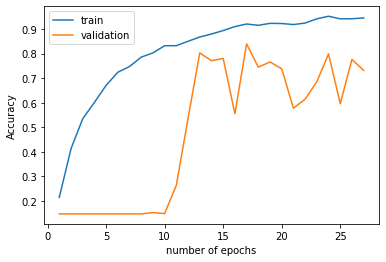

In [55]:
acc= history5.history['accuracy']
val_acc= history5.history['val_accuracy']
epochs=range(1,len(acc)+1)

plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='validation')
plt.legend()
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.show()

## Observation

It was observed the model starts improving when;
- the number of hidden layer is increased
- there is increase in the number of epochs
- there is increase in the number of drop out from 20% to 30%

All the 5 models overfit there is an improvement in model built

## Recommendation

The model 4 and 5 should be adopted due to it having more than 75% performance on the Validation accuracy and Test Accuracy.